# Chapter 14 - 고윳값 분해와 SVD 응용: 선형대수학의 선물

In [1]:
import numpy as np
import pandas as pd
import sympy as sym
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

import statsmodels.api as sm
from sklearn.decomposition import PCA

# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False
plt.rc('font', family='NanumBarunGothic')

## 14-1. PCA 연습 문제

In [2]:
# Data citation: Akbilgic, Oguz. (2013). ISTANBUL STOCK EXCHANGE. UCI Machine Learning Repository.
# data source website: https://archive-beta.ics.uci.edu/ml/datasets/istanbul+stock+exchange

# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url,index_col=0,skiprows=1)

# let's have a look
data

c:\Users\aryij\anaconda3\envs\football\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
2011-02-16,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
2011-02-17,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
2011-02-18,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


In [3]:
# 1. centroid 해준다 (평균 중심화)
centroid_data = data - data.mean(axis=0)
covariance_matrix = np.cov(centroid_data, rowvar=False)

In [4]:
# 2. 공분산 행렬의 고윳값 분해를 구한다
L, V = np.linalg.eig(covariance_matrix)

In [5]:
# 3. 고윳값을 크기에 따라 내림차순 정렬하고 그에 따라 고유벡터 정렬한다
L_sorted = L[np.argsort(L)[::-1]]
V_sorted = V[:, np.argsort(L)[::-1]]

In [6]:
# 4. 모든 데이터 특징의 가중결합으로 구성 요소 점수를 계산하며 여기서 고유 벡터는 가중치가 된다
# 가장 큰 고윳값과 관련된 고유벡터가 가장 중요한 구성 요소 즉 분산이 가장 큰 구성요소이다.
components_score = centroid_data @ V_sorted[:, 0:2]
components_score.head(3)

,0,1
date,,
2009-01-05,0.052415,0.015488
2009-01-06,0.045068,0.007488
2009-01-07,-0.069597,0.024074


In [7]:
# 5. 고윳값을 분산 비율로 변환한다
var_ratio = (L / np.sum(L)) * 100
var_ratio

array([64.10140478, 14.08853005,  9.61237955,  6.03925492,  2.97963327,
        0.24648133,  0.63257407,  1.10384893,  1.1958931 ])

In [8]:
print(f"처음 두 구성 요소의 분산:\n{np.var(components_score, ddof=1)}\n")
print(f"처음 두 고윳값:\n{L[:2]}")

처음 두 구성 요소의 분산:
0    0.001301
1    0.000286
dtype: float64

처음 두 고윳값:
[0.0013006  0.00028585]


c:\Users\aryij\anaconda3\envs\football\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [9]:
# 주성분 (증권 거래소의 가중치 조합) 1과 2 사이 상관관계 확인 → 0, 직교한다
components_score.corr()

,0,1
0,1.000000e+00,1.168259e-16
1,1.168259e-16,1.000000e+00


In [10]:
np.corrcoef(components_score.T)

array([[1.00000000e+00, 8.00996958e-17],
       [8.00996958e-17, 1.00000000e+00]])

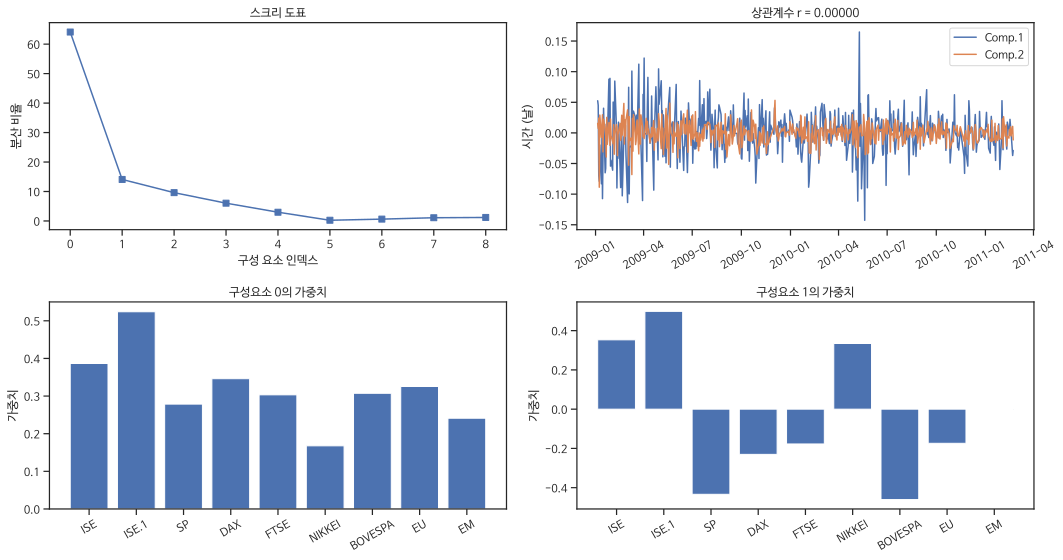

In [11]:
# subplots 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# data_dicts = {"분산 비율": var_ratio,
#               "상관계수": components_score,
#               "구성요소 0의 가중치": V[:, 0],
#               "구성요소 1의 가중치": V[:, 1]
#               }

# flatten()을 통해 axes를 1차원 array로 펴준다
axes = axes.flatten()

axes[0].plot(var_ratio, marker="s")
axes[0].set_xlabel("구성 요소 인덱스")
axes[0].set_ylabel("분산 비율")
axes[0].set_title("스크리 도표")

axes[1].plot(components_score)
axes[1].tick_params(axis='x', labelrotation=30)
axes[1].legend(["Comp.1", "Comp.2"])
axes[1].set_ylabel("시간 (날)")
axes[1].set_title(f"상관계수 r = {np.corrcoef(components_score.T)[0, 1]:.5f}")

axes[2].bar(data.columns, V[:, 0])
axes[2].tick_params(axis='x', labelrotation=30)
axes[2].set_ylabel("가중치")
axes[2].set_title("구성요소 0의 가중치")

axes[3].bar(data.columns, V[:, 1])
axes[3].tick_params(axis='x', labelrotation=30)
axes[3].set_ylabel("가중치")
axes[3].set_title("구성요소 1의 가중치")

fig.tight_layout()
plt.show()

## 14-2. 데이터 공분산 행렬의 SVD와 데이터 행렬 자체의 SVD 사용하여 결과 재현

In [12]:
# 데이터 공분산 행렬의 SVD
U, s, Vt = np.linalg.svd(covariance_matrix)

# print(f"처음 두 구성 요소의 분산:\n{np.var(components_score, ddof=1)}\n")
print(f"처음 두 고윳값:\n{L[:2]}\n")

# print(f"처음 두 구성 요소의 분산:\n{np.var(components_score, ddof=1)}\n")
print(f"처음 두 특잇값:\n{s[:2]}")

처음 두 고윳값:
[0.0013006  0.00028585]

처음 두 특잇값:
[0.0013006  0.00028585]


In [13]:
print(f"처음 두 고유벡터:\n{V[:,2]}\n")

# print(f"처음 두 구성 요소의 분산:\n{np.var(components_score, ddof=1)}\n")
print(f"처음 두 특이벡터:\n{Vt[2, :]}")

처음 두 고유벡터:
[ 0.33940396  0.21717495 -0.0068195  -0.00229672  0.01055111 -0.87202354
 -0.13349569  0.00184435 -0.24336666]

처음 두 특이벡터:
[-0.33940396 -0.21717495  0.0068195   0.00229672 -0.01055111  0.87202354
  0.13349569 -0.00184435  0.24336666]


In [14]:
# 데이터 행렬 자체의 SVD
U2, s2, Vt2 = np.linalg.svd(centroid_data)

# X.T@X의 고윳값은 X의 특잇값 제곱한 값이며, 공분산 행렬의 보정 계수를 특잇값에 적용하여 동등성을 찾아야 한다

print(f"처음 두 고윳값:\n{L[:2]}\n")

print(f"처음 두 특이값:\n{s2[:2]}\n")

print(f"처음 두 특이값을 제곱하고 고윳값 구한 값:\n{s2[:2]**2/(centroid_data.shape[0]-1)}\n")

print(f"처음 두 고유벡터:\n{V[:,2]}\n")

print(f"처음 두 특이벡터:\n{Vt2[2, :]}\n")

처음 두 고윳값:
[0.0013006  0.00028585]

처음 두 특이값:
[0.83415871 0.39106393]

처음 두 특이값을 제곱하고 고윳값 구한 값:
[0.0013006  0.00028585]

처음 두 고유벡터:
[ 0.33940396  0.21717495 -0.0068195  -0.00229672  0.01055111 -0.87202354
 -0.13349569  0.00184435 -0.24336666]

처음 두 특이벡터:
[ 0.33940396  0.21717495 -0.0068195  -0.00229672  0.01055111 -0.87202354
 -0.13349569  0.00184435 -0.24336666]



## 14-3. 수작업한 PCA와 `sklearn.decomposition.PCA`와 비교

In [15]:
# PCA 불러오고 fit_transform
pca = PCA()
data_pca = pca.fit_transform(centroid_data)

In [16]:
print(f"처음 두 고윳값:\n{L[:2]}\n")
print(f"PCA를 통해 나타낸 처음 두 고윳값:\n{pca.explained_variance_[:2]}\n")

print(f"처음 두 고유벡터:\n{V[:, 2]}\n")
print(f"PCA를 통해 나타낸 처음 두 고유벡터:\n{pca.components_[2,:]}\n")

처음 두 고윳값:
[0.0013006  0.00028585]

PCA를 통해 나타낸 처음 두 고윳값:
[0.0013006  0.00028585]

처음 두 고유벡터:
[ 0.33940396  0.21717495 -0.0068195  -0.00229672  0.01055111 -0.87202354
 -0.13349569  0.00184435 -0.24336666]

PCA를 통해 나타낸 처음 두 고유벡터:
[-0.33940396 -0.21717495  0.0068195   0.00229672 -0.01055111  0.87202354
  0.13349569 -0.00184435  0.24336666]



## 14-4. 데이터를 생성해서 SVD를 사용하고 PCA를 구현

In [41]:
x = np.hstack((np.random.randn(1000,1),.05*np.random.randn(1000,1)))

# rotation matrices
th = -np.pi/6
R1 = np.array([ [np.cos(th), -np.sin(th)],
                [np.sin(th),  np.cos(th)] ])
th = -np.pi/3
R2 = np.array([ [np.cos(th), -np.sin(th)],
                [np.sin(th),  np.cos(th)] ])

# create the data
data = np.vstack((x @ R1,x @ R2))
data.shape

(2000, 2)

In [42]:
# 특이값 분해
U, s, vt = np.linalg.svd(data - np.mean(data, axis=0, keepdims=True))

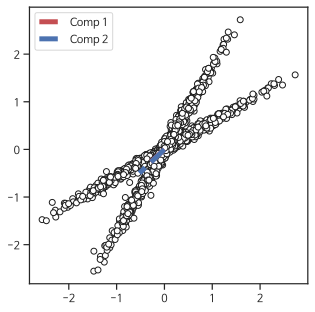

In [43]:
plt.figure(figsize=(5,5))

plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')

# eigenvectors
plt.plot([0,Vt[0,0]],[0,Vt[1,0]],'r--',linewidth=5,label='Comp 1')
plt.plot([0,Vt[0,1]],[0,Vt[1,1]],'--',linewidth=5,label='Comp 2')

plt.legend()
plt.show()